In [1]:
#%matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Bisection(xl, xu, err, fnc):
    print('Bisection')
    er = err+100
    i = 0
    xrn = 0
    fxl = fnc(xl)
    x = np.array([])
    y = np.array([])
    while not er <= err:
        x = np.append(x,i)
        xr = xrn
        xrn = (xl+xu)/2
        fxr = fnc(xrn)
        if not xrn == 0:
            er = np.abs(((xrn - xr) / xrn)) * 100
        y = np.append(y, er)
        if (fxl * fxr < 0):
            xu = xrn
        elif (fxl * fxr >0):
            xl = xrn
            fxl = fxr
        else:
            print('i = {:3d}, L = {:22}, error = {}%'.format(i,xrn,er))
            return x, y
            break
        print('i = {:3d}, L = {:22}, error = {}%'.format(i,xrn,er))
        i += 1
    return x, y

In [3]:
def FlasePosition(xl, xu, err, fnc):
    print('FlasePosition')
    xrn = 0
    i = 0
    er = err +100
    fxl = fnc(xl)
    fxu = fnc(xu)
    x = np.array([])
    y = np.array([])
    while not er <= err:
        x = np.append(x,i)
        xr = xrn
        xrn = xu - (fxu * (xl - xu))/(fxl - fxu)
        fxr = fnc(xrn)
        if not xrn == 0:
            er = np.abs((xrn - xr)/xrn) * 100
        y = np.append(y, er)
        if (fxl * fxr <0):
            xu = xrn
            fxu = fxr
        elif (fxl * fxr >0):
            xl = xrn
            fxl = fxr
        else:
            print('i = {:3d}, L = {:22}, error = {}%'.format(i,xrn,er))
            return x, y
            break
        print('i = {:3d}, L = {:22}, error = {}%'.format(i,xrn,er))
        i += 1
    return x, y

In [4]:
def Newton(xi, err, fnc, dfnc):
    print('Newton-Raphson')
    er = err + 100
    i = 0
    y = np.array([])
    x = np.array([])
    while not er <= err:
        xi1 = xi - fnc(xi)/dfnc(xi)
        er = np.abs((xi1 - xi)/xi1) * 100
        print('i = {:3d}, L = {:22}, error = {}%'.format(i,xi1,er))
        y = np.append(y, er)
        x = np.append(x, i)
        xi = xi1
        i += 1
    return x, y

In [5]:
def Secant(xi_1, xi, err, fnc):
    print('Secant')
    er = err + 100
    x = np.array([])
    y = np.array([])
    i = 0
    while not er <= err:
        xi1 = xi - (fnc(xi) * (xi_1 - xi))/(fnc(xi_1) - fnc(xi))
        er = np.abs((xi1 - xi)/xi1) * 100
        print('i = {:3d}, L = {:22}, error = {}%'.format(i,xi1,er))
        y = np.append(y, er)
        x = np.append(x, i)
        xi_1 = xi
        xi = xi1
        i += 1
    return x, y

8.29 Perform the same computation as in Sec. 8.3, but determine
the value of L required for the circuit to dissipate to 1% of its original
value in t = 0.05 s, given R = 280 Ohm, and C = 10^-4 F.
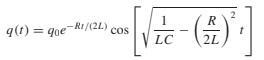

In [6]:
C = 1e-4
R = 280.0
t = 0.05
#q0/q(t)
qq0 = 0.01

def fncL(L):
    eP = np.exp(-(R * t/(2 * L)))
    sq = ((1/(L * C)) - ((R/(2 * L))**2))**(1/2)
    fl = eP * np.cos(sq * t) - qq0
    return fl

def dfncL(L):
    #not yet *t
    theta = np.sqrt((1/(L * C)) - (R/(2 * L))**2)
    eP = np.exp(-((R * t)/(2 * L)))
    eq1 = eP * (-(np.sin(theta * t))) * (((t/2) * ((R**2)/(2 * (L**3))) - (1/(C * (L**2))))/theta)
    eq2 = np.cos(theta * t) * eP * ((R * t)/(2 * (L**2)))
    dfL = eq1 + eq2
    return dfL

Bisection
i =   0, L =                    7.5, error = 100.0%
i =   1, L =                   8.75, error = 14.285714285714285%
i =   2, L =                  8.125, error = 7.6923076923076925%
i =   3, L =                 7.8125, error = 4.0%
i =   4, L =                7.96875, error = 1.9607843137254901%
i =   5, L =               7.890625, error = 0.9900990099009901%
i =   6, L =              7.8515625, error = 0.4975124378109453%
i =   7, L =             7.83203125, error = 0.24937655860349126%
i =   8, L =            7.841796875, error = 0.12453300124533001%
i =   9, L =           7.8369140625, error = 0.06230529595015576%
i =  10, L =          7.83935546875, error = 0.03114294612270321%
i =  11, L =         7.840576171875, error = 0.015569048731122527%
i =  12, L =        7.8411865234375, error = 0.007783918424534911%
i =  13, L =       7.84149169921875, error = 0.0038918077446974124%
i =  14, L =      7.841339111328125, error = 0.0019459417385043491%
i =  15, L =     7.8414154052

Text(0, 0.5, '%Error')

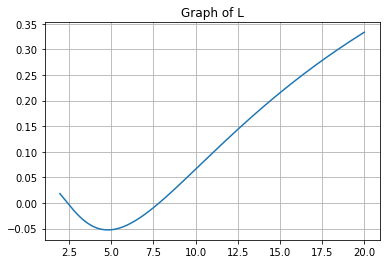

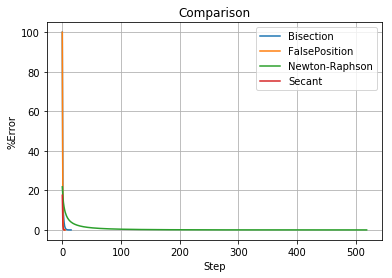

In [7]:
x1, y1 = Bisection(5,10,0.001,fncL)
x2, y2 = FlasePosition(5,10,0.001,fncL)
x3, y3 = Newton(100, 0.001, fncL, dfncL)
x4, y4 = Secant(6, 9, 0.001, fncL)
x = np.arange(1.96,20,1e-4)
#x = np.linspace(0,20,1000)
fig1 = plt.figure()
plt.title('Graph of L')
plt.plot(x, fncL(x))
plt.grid()

fig2 = plt.figure()
plt.title('Comparison')
plt.plot(x1, y1, label = 'Bisection')
plt.plot(x2, y2, label = 'FalsePosition')
plt.plot(x3, y3, label = 'Newton-Raphson')
plt.plot(x4, y4, label = 'Secant')
plt.legend()
plt.grid()
plt.xlabel('Step')
plt.ylabel('%Error')

8.33 Figure P8.33 shows a circuit with a resistor, an inductor, and
a capacitor in parallel. Kirchhoff’s rules can be used to express the
impedance of the system as
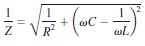
where Z = impedance (Ohm) and w = the angular frequency. Find the
w that results in an impedance of 75 Ohm using both bisection and
false position with initial guesses of 1 and 1000 for the following
parameters: R = 225 Ohm, C = 0.6 x 10^-6 F, and L = 0.5 H. Determine
how many iterations of each technique are necessary to determine
the answer to Es = 0.1%. Use the graphical approach to
explain any difficulties that arise.
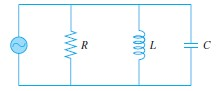
Figure P8.33

In [8]:
def fncW(w):
    Z = 75
    R = 225
    C = 0.6e-6
    L = 0.5
    
    eq1 = ((w * C) - (1/(w * L)))**2
    eq2 = 1/(R**2)
    fw = np.sqrt(eq2 + eq1) - (1/Z)
    return fw

Bisection
i =   0, L =                  500.5, error = 100.0%
i =   1, L =                 250.75, error = 99.6011964107677%
i =   2, L =                125.875, error = 99.20556107249256%
i =   3, L =               188.3125, error = 33.15632260205775%
i =   4, L =              157.09375, error = 19.872687487567138%
i =   5, L =             172.703125, error = 9.038270152899665%
i =   6, L =            164.8984375, error = 4.733026957881272%
i =   7, L =           160.99609375, error = 2.4238748028630352%
i =   8, L =          159.044921875, error = 1.2268055163267062%
i =   9, L =         158.0693359375, error = 0.6171886101209046%
i =  10, L =        157.58154296875, error = 0.3095495573658231%
i =  11, L =       157.825439453125, error = 0.1545355965553567%
i =  12, L =      157.9473876953125, error = 0.07720814124684579%
FlasePosition
i =   0, L =      995.6574270925779, error = 100.0%
i =   1, L =      991.3354265145581, error = 0.4359776179103735%
i =   2, L =       987.033909811

Text(0, 0.5, '%Error')

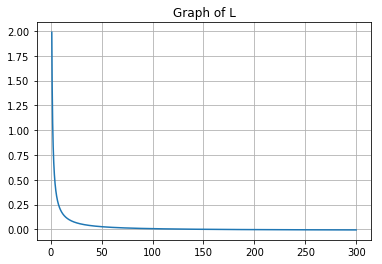

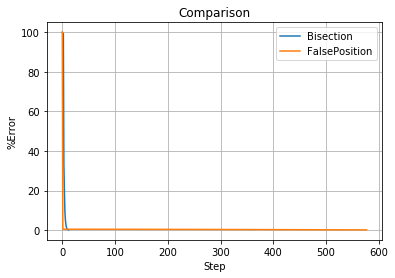

In [9]:
w1, z1 = Bisection(1, 1000, 0.1, fncW)
w2, z2 = FlasePosition(1, 1000, 0.1, fncW)
x = np.arange(1, 300, 1e-2)
#x = np.linspace(0,20,1000)
fig1 = plt.figure()
plt.title('Graph of L')
plt.plot(x, fncW(x))
plt.grid()

fig2 = plt.figure()
plt.title('Comparison')
plt.plot(w1, z1, label = 'Bisection')
plt.plot(w2, z2, label = 'FalsePosition')
plt.legend()
plt.grid()
plt.xlabel('Step')
plt.ylabel('%Error')